# **Instrodução à visualização em python**

## **A biblioteca Matplotlib**

### **Por que Matplotlib**

* É a biblioteca de visualização mais usada no ambiente Python.
* É simples e fácil de usar.
* Permite um alto nível de personalização dos gráficos.
* É um código aberto.
* É a base sobre a qual outras bibliotecas como a Seaborn são construídas.

[Matplotlib](https://matplotlib.org/stable/users/getting_started/)

### **Estrutura do Matplotlib**
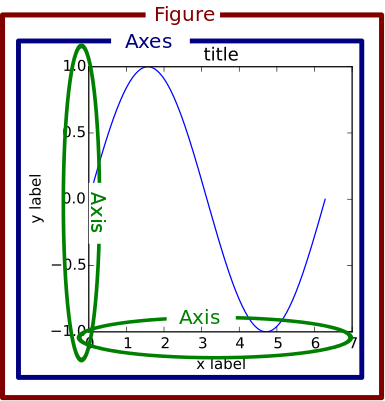

* A dimensão **Figure** pode ter mais de um **Axes**

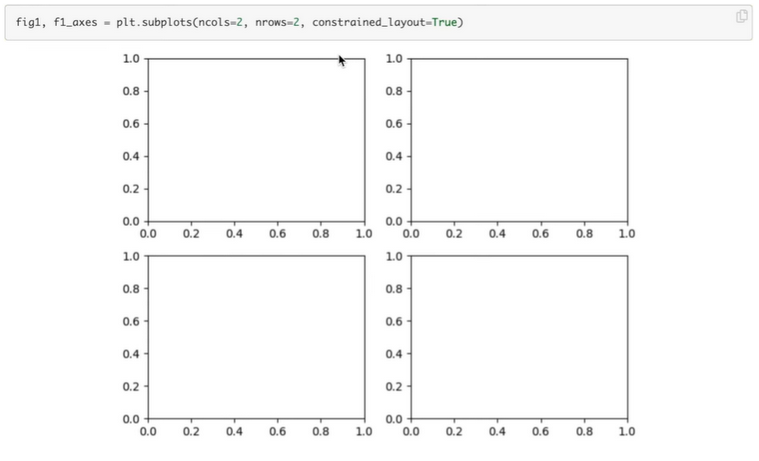

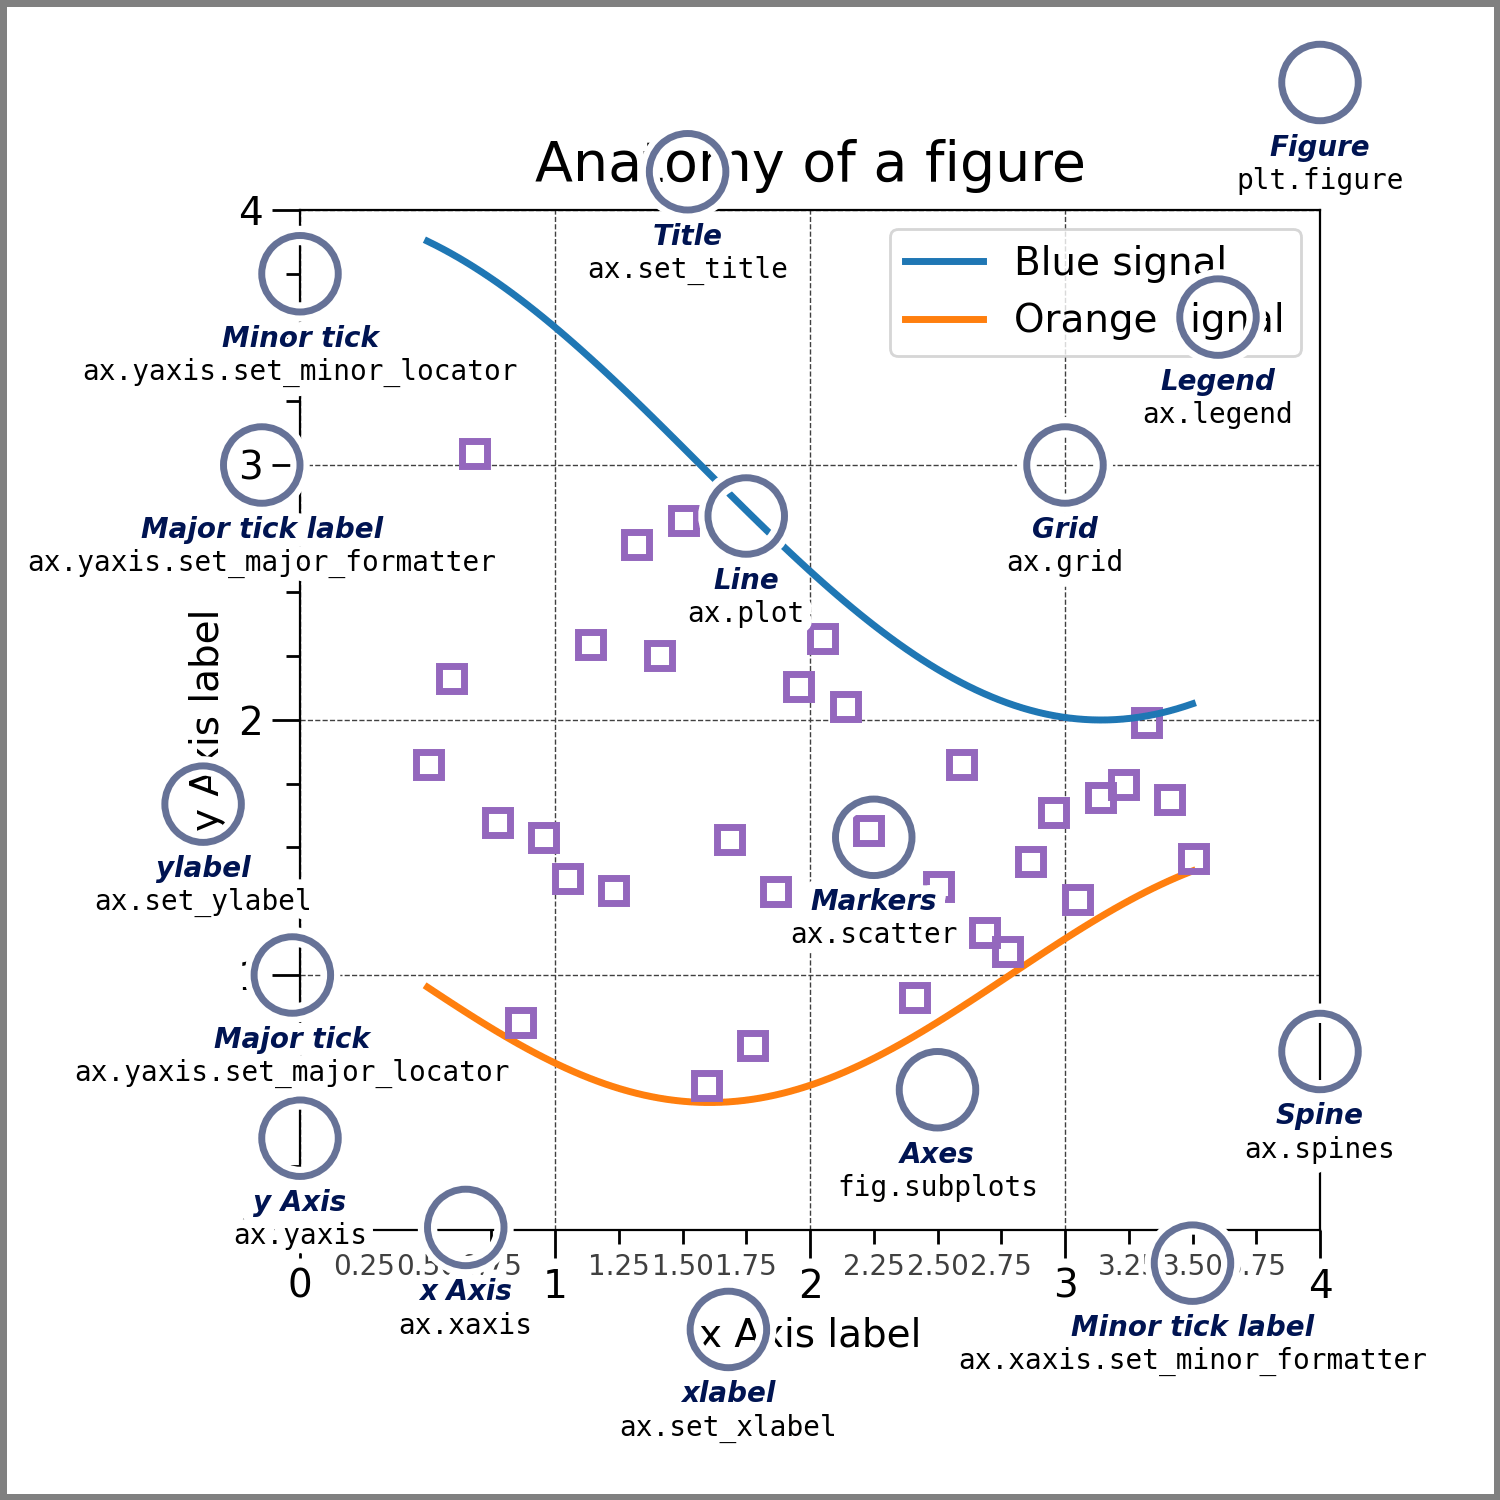

### **Interfaces do Matplotlib**

* Define a maneira como interagimos com o gráfico.
* Eles fornecem compatibilidade com a linguagem que inspirou a biblioteca: MATLAB
* Existem duas interfaces disponíveis:
     * **Interface orientada ao estado**, orientada aos usuários do MATLAB para manter a compatibilidade.
     * **Interface orientada a objetos**: permite um **maior** grau de controle sobre os gráficos porque os tratamos como **objetos**. Mais Pythonista para nosso gosto (e os mais usados)


* Vamos importar as bibliotecas que usaremos

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

* Os estilos padrão da matplotlib não são muito estéticos. Podemos mudar o estilo facilmente.

In [5]:
# Mudando o estilo
mpl.style.use('bmh')

Outros opções 
```mpl.style.use('fivethirtyeight')```
e
```mpl.style.use('ggplot')```

### **Primeiro contato**

* Vamos representar graficamente uma linha conectando os pontos com as coordenadas (x, y) = (1, 2) e (x, y) = (3, 4). Nós precisamos de:
    * Uma matriz com as duas coordenadas do eixo x [1, 3]
    * Uma matriz com as duas coordenadas do eixo y [2, 4]

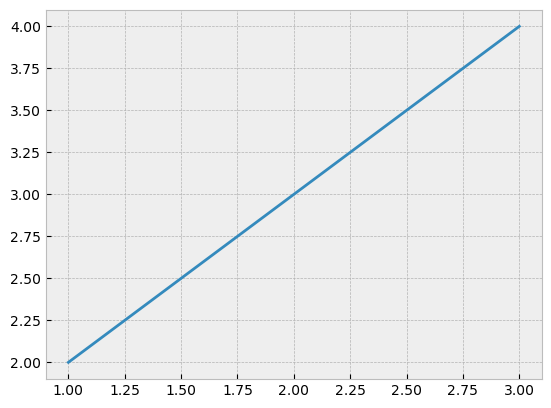

In [10]:
fig, ax = plt.subplots()
ax.plot([1, 3], [2, 4])

* Ambas as formas retornam o mesmo resultado.
* A interface orientada para o estado parece mais simples, mas tornar os gráficos mais complexos e profissionais torna-a **mais difícil** de implementar.
* Para evitar confusão, usaremos e recomendaremos a interface **orientada a objetos**.

### ** Comandos básicos**
* Ao gerar visualizações, uma boa prática é sempre tentar incluir informações sobre o que está sendo exibido.
    * **Etiquetar os eixos** ```ax.set_xlabel e  ax.set_xlabel```
    * **Adicionar um título** ```ax.set_titl```
    * **Adicionar uma legenda** ```ax.legend```

### **Exemplo de Uso**
* Vamos importar o Data Frame de precipitação da última aula. Os dados estão disponíveis
[link dos dados](https://www.kaggle.com/abhishekmamidi/precipitation-data-of-pune-from-1965-to-2002)

In [15]:
# importando arquivo csv
df_chuvas = pd.read_csv('10 - pune_1965_to_2002.csv')
df_chuvas.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


* Por conveniência, colocamos o Year como o índice do Data Frame o removemos das colunas

In [18]:
# Colocando o Year como índice
df_chuvas.index = df_chuvas['Year']

In [20]:
# Excluíndo a coluna Year
df_chuvas = df_chuvas.drop('Year', axis='columns')

* Após a alteração do índice, os dados são os seguintes:

In [23]:
df_chuvas.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


* Vamos representar graficamente a precipitação acumulada para os diferentes anos:
    * Para o eixo x, selecionamos os anos

In [26]:
x = df_chuvas.index
x

Index([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002],
      dtype='int64', name='Year')


* Para o eixo y, acumulamos as precipitações por ano

In [29]:
y = df_chuvas.sum(axis='columns')
y.head()

Year
1965    1263.394
1966     899.588
1967    1522.184
1968    1086.237
1969    1739.022
dtype: float64

* Definimos os objetos fig e ax, como os que conterão a figura :

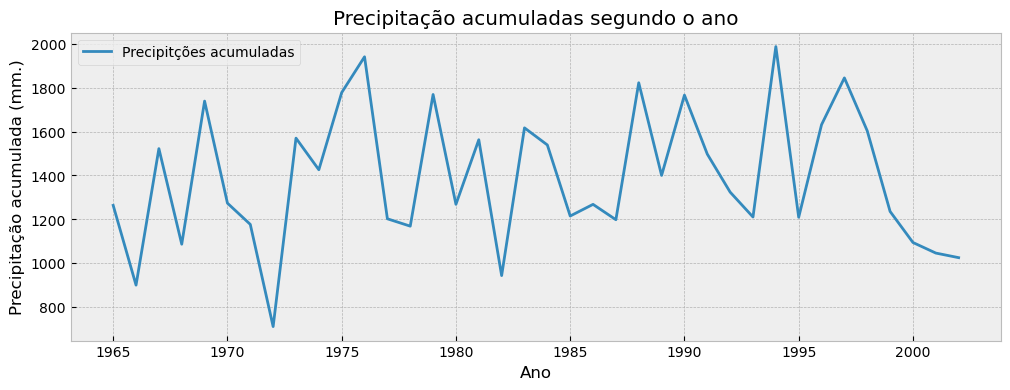

In [32]:
# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação acumulada (mm.)')
ax.set_title('Precipitação acumuladas segundo o ano')
ax.plot(x, y, label='Precipitções acumuladas')
ax.legend()

sendo ```width=12 e height=4```
* Rotulamos os eixos, adicionamos um título e inserimos a legenda:

### **Algumas observações**

* O método *ax.plot* recebe o parâmetro *figsize*, que define o tamanho do gráfico. Para uma forma retangular 12x4
```fig, ax = plt.subplots(figsize=(12, 4))```
* O método *ax.legend* insere a legenda em algum canto que não cobre o gráfico. Isso pode ser modificado com o parâmetro *loc*.
```ax.legend(loc='upper right')```
Isso forçará a legenda a aparecer no canto superior direito

### **Pro-tip**
Se não lembrarmos quais parâmetros um método ou função aceita, podemos escrever o nome do método seguido por um "?" Isso abre a documentação diretamente no ambiente Jupyter.

Por exemplo, ```ax.legend?```
mostra informações relacionadas ao método de *legend*

In [37]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artist

### **Algumas observações**
* Se você olhar para a série temporal anterior, poderá ver os eixos vazios nas laterais. Eles podem ser cortados com ```ax.set_xlim```

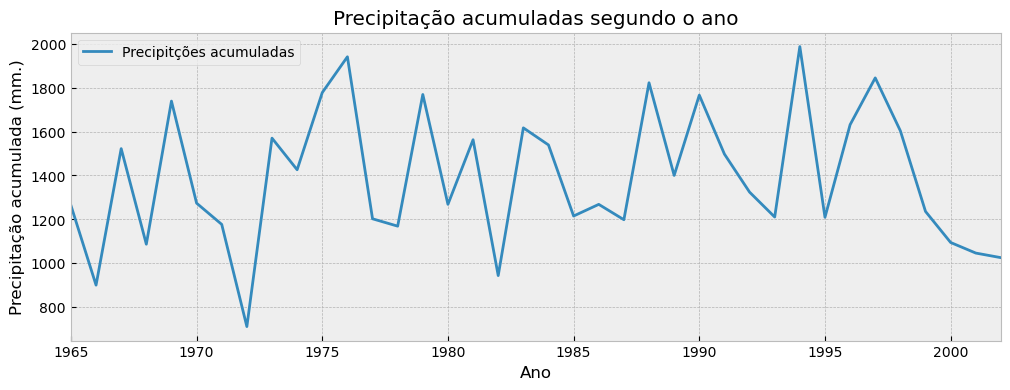

In [40]:
# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação acumulada (mm.)')
ax.set_title('Precipitação acumuladas segundo o ano')
ax.set_xlim(1965, 2002)
ax.plot(x, y, label='Precipitções acumuladas')
ax.legend()

### **Exportando os gráficos**

* A Matplotlib permite que você salve as visualizações no computador.
* Alguns dos formatos suportados são jpeg, jpg, png, pdf e svg.
* O gráfico será salvo no caminho atual, mas você ainda pode especificar qualquer outro caminho.
```fig.savefig('precipitações_ano.pdf')```

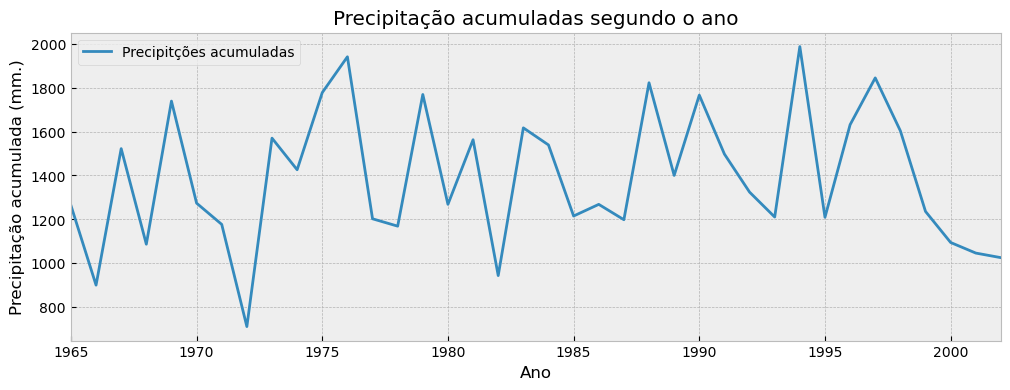

In [43]:
# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel('Ano')
ax.set_ylabel('Precipitação acumulada (mm.)')
ax.set_title('Precipitação acumuladas segundo o ano')
ax.set_xlim(1965, 2002)
ax.plot(x, y, label='Precipitções acumuladas')
ax.legend()
fig.savefig('precipitações_ano.pdf')

## **Gráficos mais comuns**

### **Gráficos de linhas**

* Eles são adequados para visualizar **dados com sequenciamento de tempo**, como séries temporais ou **curvas de crescimento**.
* Eles são plotados com o método ```ax.plot(x, y)```
* **Se x não for especificado, matplotlib tomará como coordenadas em x a matriz de inteiros [0, 1, 2, …, n]**

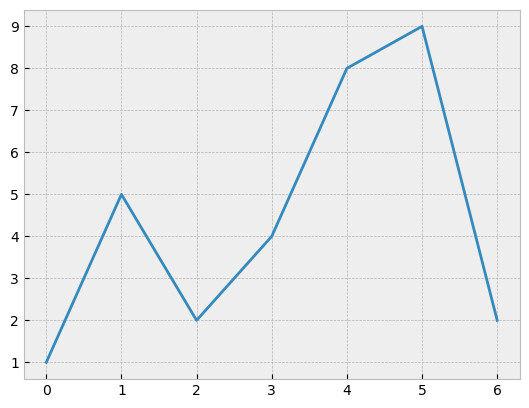

In [47]:
fig, ax = plt.subplots()
ax.plot(
    [0, 1, 2, 3, 4, 5, 6],
    [1, 5, 2, 4, 8, 9, 2]
)

equivalente a

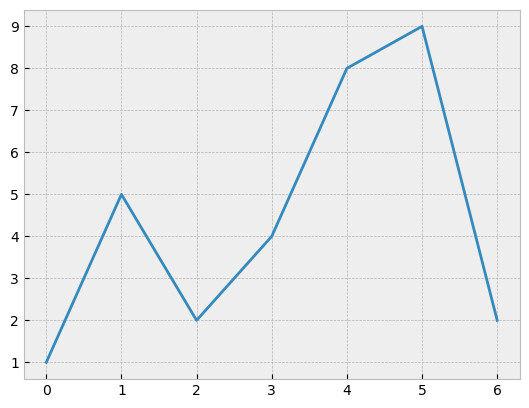

In [50]:
fig, ax = plt.subplots()
ax.plot([1, 5, 2, 4, 8, 9, 2])

### **Gráficos de dispersão**

* Útil quando você tem uma grande quantidade de dados numéricos emparelhados
* **Eles permitem visualizar a relação entre duas variáveis através da nuvem de pontos**
    * Nuvem de pontos "alinhada" **relação forte**
    * Nuvem de pontos "dispersa" **relação fraca ou nula**
* São representados graficamente com ```ax.scatter```

Vejamos um exemplo

Considere as medidas de peso e altura de 50 alunos(as)

In [53]:
pesos = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
       52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
       64.6, 60.2, 64. , 63.8, 61.4, 66.3, 64.7, 63.9, 69.3, 67.9, 65.2,
       70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
       76. , 81.5, 79.4, 81.8, 81.8, 84.1]

alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
       157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
       169.8, 166.7, 179.4, 180.6, 163.3, 178.8, 176.3, 184.8, 181. ,
       170.5, 184.1, 187.1, 187.1, 177.7, 184.5, 190.3, 196. , 192.1,
       200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
       196.8, 213.1, 204.8, 215.5, 210.2] 

### **Gráficos de dispersão**

Text(0, 0.5, 'Peso (kg.)')

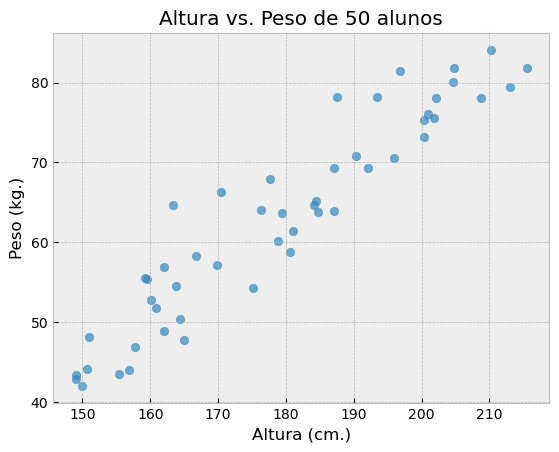

In [56]:
fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title('Altura vs. Peso de 50 alunos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')

Como esperado, uma ***forte relação positiva*** entre peso e altura é observada. 

***Algumas observações**

* Para visualizar o relacionamento, os valores das matrizes **emparelhadas devem corresponder entre si**. O peso da primeira pessoa deve estar junto com a altura da mesma pessoa.
* O Parâmetro alpha permite que você altere a transparência dos pontos. Muito útil ao traçar muitos pontos.
    * **alpha = 1 -> pontos sólidos**
    * **alpha = 0.01 -> pontos quase transparentes**

Vamos tentar o Dataframe de Precipitação

A precipitação em agosto será relacionada com a de setembro?

Text(0, 0.5, 'Precipitações em Setembro (mm.)')

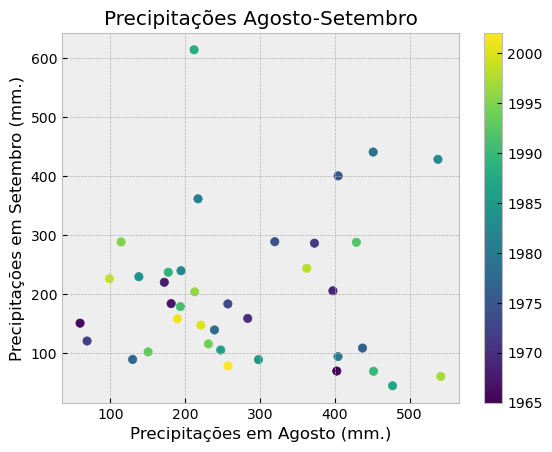

In [60]:
fig, ax = plt.subplots()
mapeamento_cores = ax.scatter(
    df_chuvas['Aug'],
    df_chuvas['Sep'],
    c=df_chuvas.index
)
fig.colorbar(mapeamento_cores)
ax.set_title('Precipitações Agosto-Setembro')
ax.set_xlabel('Precipitações em Agosto (mm.)')
ax.set_ylabel('Precipitações em Setembro (mm.)')

* É possível atribuir uma grama de cores aos pontos com o parâmetro ```c``` e ```fig.colorbar``` 
* Um *intervalo de tamanho* também pode ser atribuído com o parâmetro  ```s```

### **Gráficos de barras**

* Eles permitem que os valores de diferentes **variáveis categóricas** sejam comparados e colocados em perspectiva. Por exemplo, precipitação de acordo com o mês do ano.

* Por exemplo, vamos acumular a precipitação para os diferentes meses ao longo dos anos.

In [65]:
precipitacoes_acumuladas = df_chuvas.sum()
precipitacoes_acumuladas

Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64

Text(0.5, 0, 'Mês')

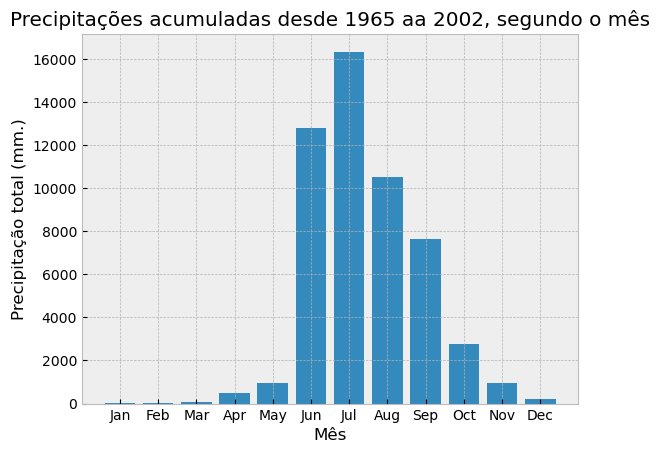

In [67]:
fig, ax = plt.subplots()
precipitacoes_acumuladas = df_chuvas.sum()
ax.bar(df_chuvas.columns, precipitacoes_acumuladas)
ax.set_title('Precipitações acumuladas desde 1965 aa 2002, segundo o mês')
ax.set_ylabel('Precipitação total (mm.)')
ax.set_xlabel('Mês')

#### ***Ter em mente**

* O eixo ```x``` representa categorias. A altura de cada barra no eixo ```y``` representa o número de itens da categoria correspondente,

* Eles são repe